#### PCA analysis on the obtained transcriptome

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Base_dir = 'C:/github/LiverDeconv' # cloning repository

import sys
sys.path.append(Base_dir)
import liver_deconv as ld
from _utils import processing as pc

In [2]:
#%% load data
df_mix = pd.read_csv(Base_dir+'/data/processed/mix_processed.csv',index_col=0)
ans_df = pd.read_csv('C:/github/LiverDeconv/Data/processed/facs_true_population.csv',index_col=0).T
common = sorted(set(df_mix.columns) & set(ans_df.columns))
remove_list=["CIV_7","CIV_8","CIP_7","CIP_8"]
target_mix = df_mix.drop(columns=remove_list)
#%% normalize with Ctrl expression
print(target_mix.columns.tolist())
ctrl_df = target_mix[['Ctrl_1', 'Ctrl_10', 'Ctrl_12', 'Ctrl_15', 'Ctrl_16', 'Ctrl_17', 'Ctrl_18', 'Ctrl_2', 'Ctrl_3', 'Ctrl_4', 'Ctrl_7', 'Ctrl_8', 'Ctrl_9']]
ctrl_m = ctrl_df.T.mean()
ctrl_v = ctrl_df.T.var()

norm_df = (((target_mix.T-ctrl_m))/np.sqrt(ctrl_v)).T # normalization 

['ANIT_1', 'ANIT_2', 'ANIT_3', 'ANIT_4', 'APAP_1', 'APAP_11', 'APAP_2', 'APAP_4', 'APAP_6', 'APAP_8', 'Ctrl_1', 'Ctrl_10', 'Ctrl_12', 'Ctrl_15', 'Ctrl_16', 'Ctrl_17', 'Ctrl_18', 'Ctrl_2', 'Ctrl_3', 'Ctrl_4', 'CCl4_1', 'CCl4_10', 'CCl4_11', 'CCl4_12', 'CCl4_5', 'CCl4_6', 'CCl4_8', 'Ctrl_7', 'Ctrl_8', 'Ctrl_9', 'ConA_11', 'ConA_12', 'ConA_2', 'ConA_3', 'ConA_4', 'ConA_5', 'ConA_8', 'MDA_1', 'MDA_2', 'MDA_3', 'MDA_4', 'MDA_12', 'MDA_7', 'MDA_8', 'TAA_1', 'TAA_3', 'TAA_6', 'TAA_7', 'TAA_8', 'GAL_2', 'GAL_4', 'GAL_7', 'GAL_8']


***
#### PCA (3D)

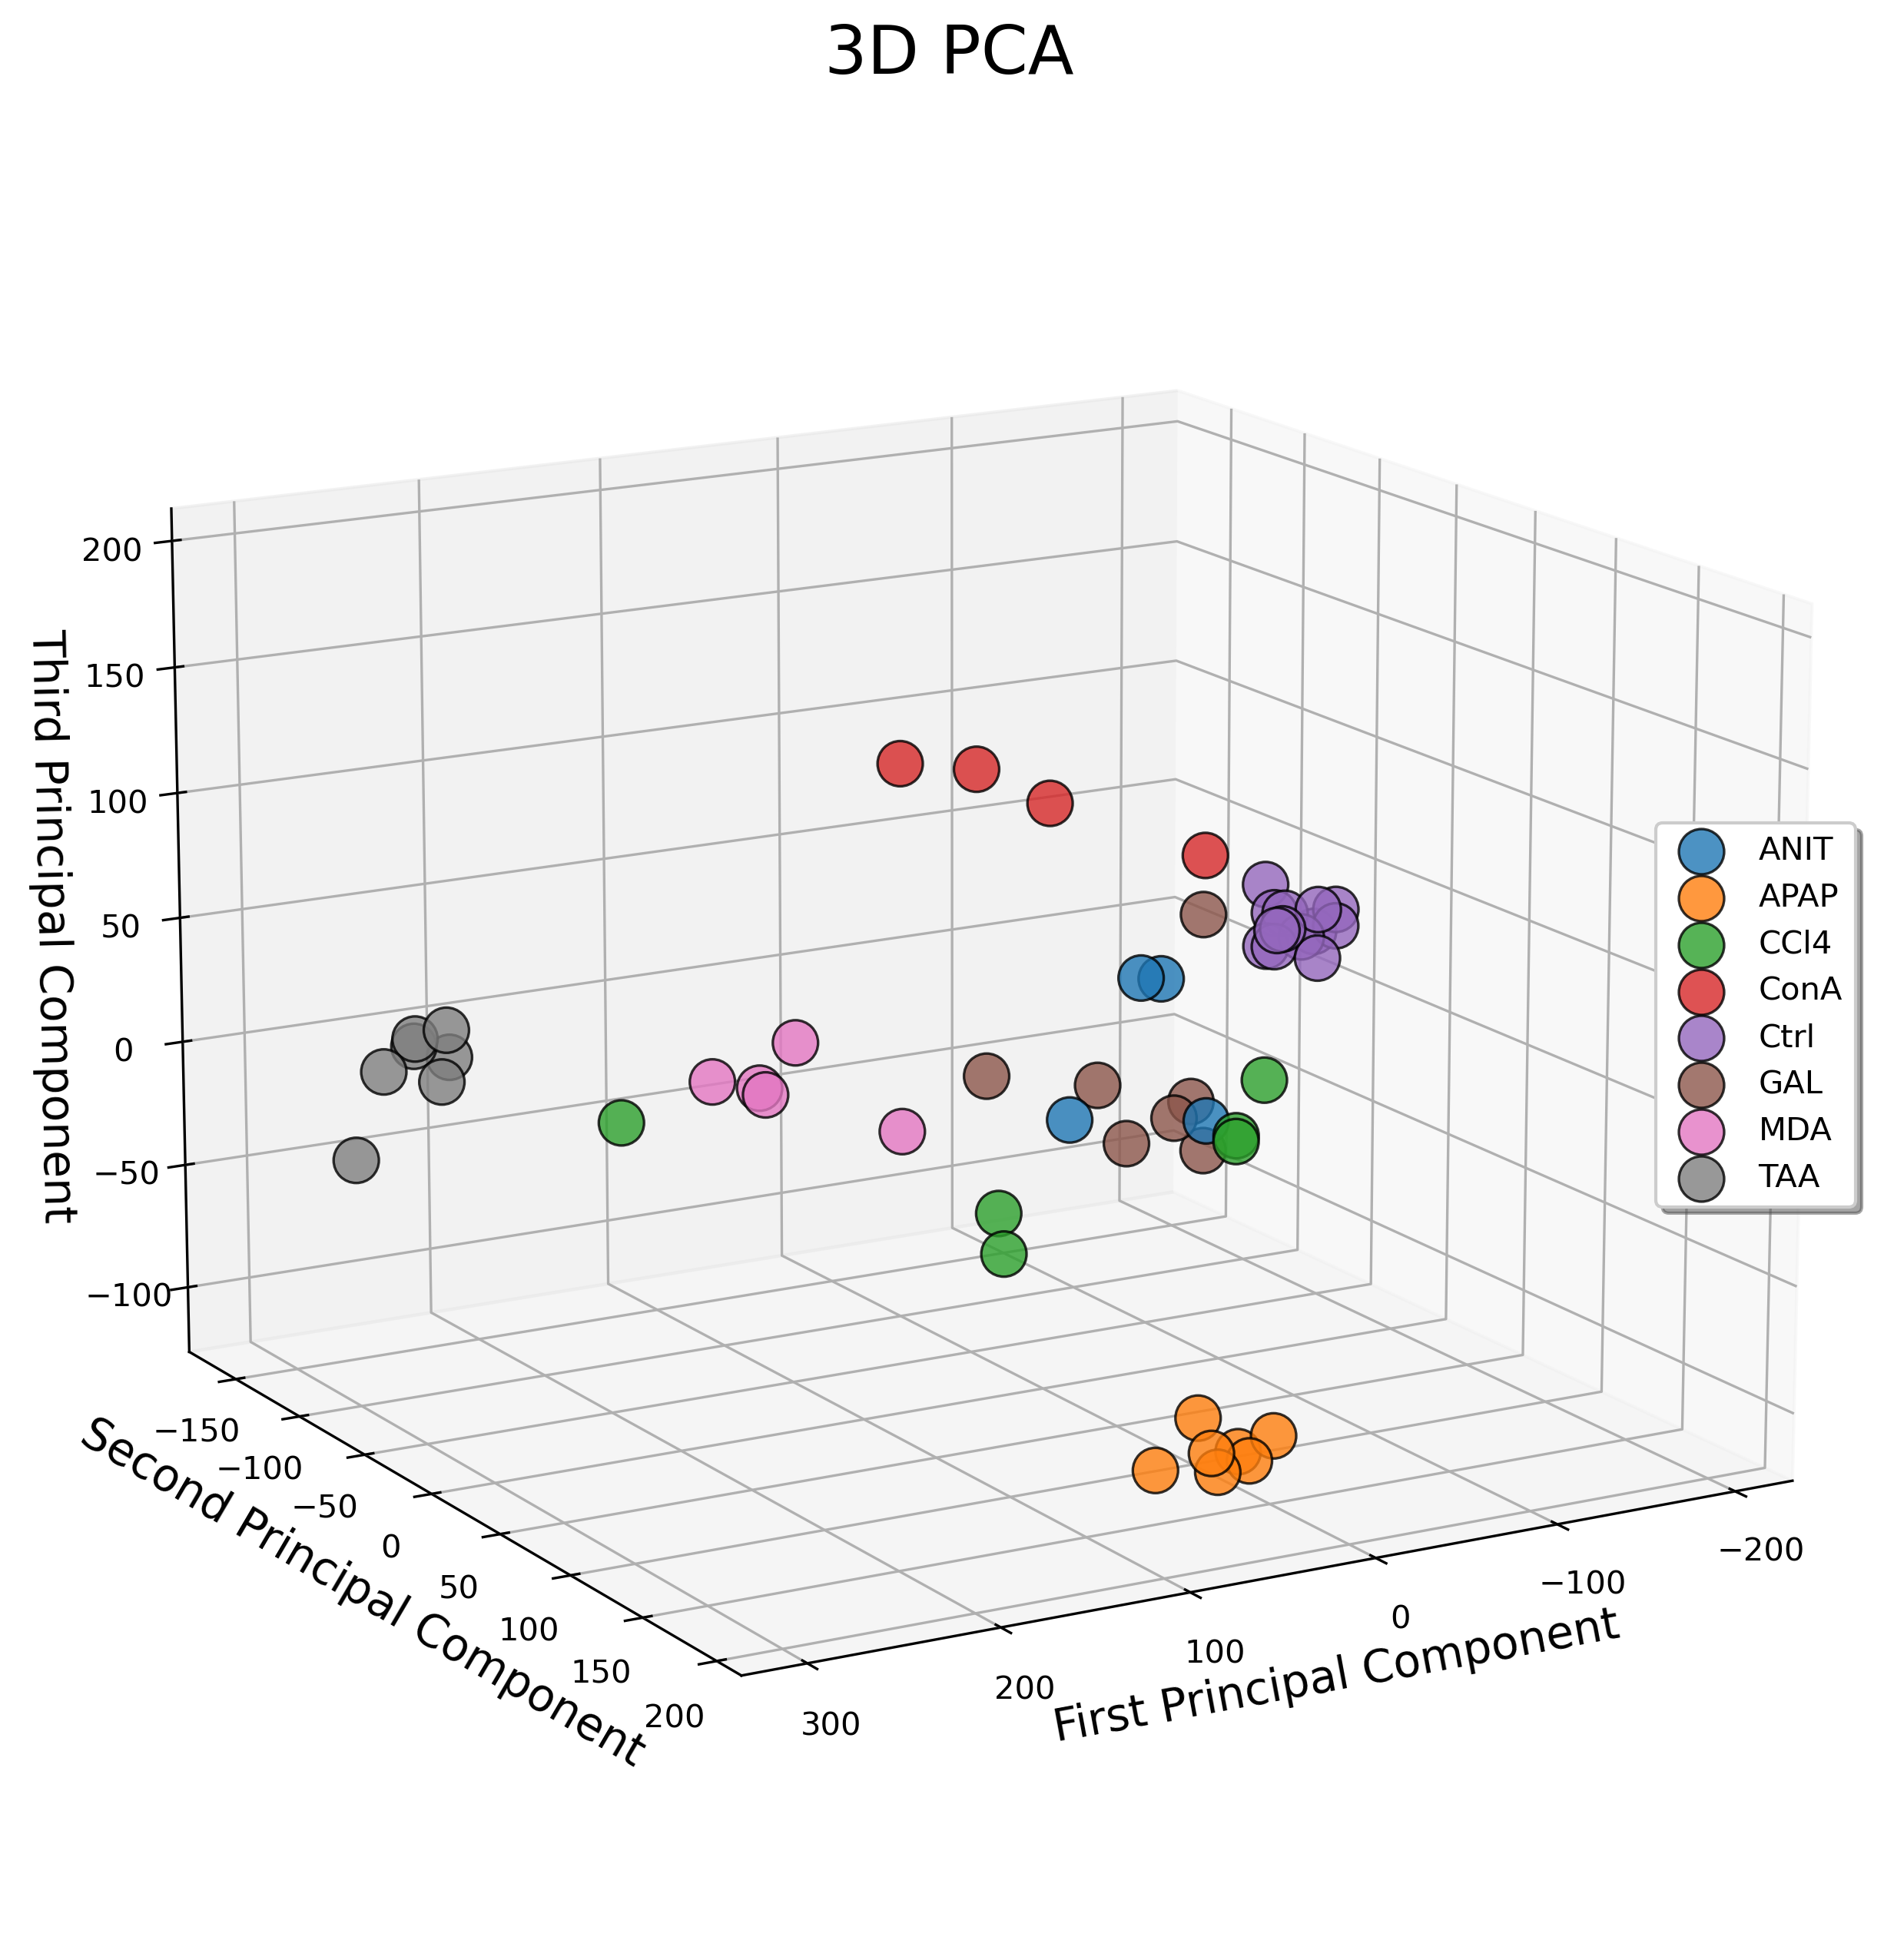

In [4]:
from mpl_toolkits.mplot3d import Axes3D

norm_df = norm_df.replace([np.inf, -np.inf], np.nan)
final_df = norm_df.dropna().T

target_names = [t.split('_')[0] for t in target_mix.columns.tolist()]
target_dic = dict(zip(list(set(target_names)), [i for i in range(len(set(target_names)))]))
targets = [target_dic.get(k) for k in target_names]

# perform PCA
pca3 = PCA(n_components=3)
pca3.fit(final_df)
transformed = pca3.fit_transform(final_df)

fig = plt.figure(figsize = (10, 8), dpi=300)
ax = Axes3D(fig)
for label in np.unique(targets):
    p = ax.scatter(transformed[targets == label, 0],
                   transformed[targets == label, 1],
                   transformed[targets == label, 2],
                   marker = 'o', s = 200, label=np.unique(target_names)[label],alpha=0.8,linewidths=0.8,edgecolor='k')
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)
plt.legend(shadow=True,loc='right')
ax.view_init(elev=15, azim=60)
plt.title('3D PCA',fontsize = 21)
plt.show()

***
#### PCA (2D)

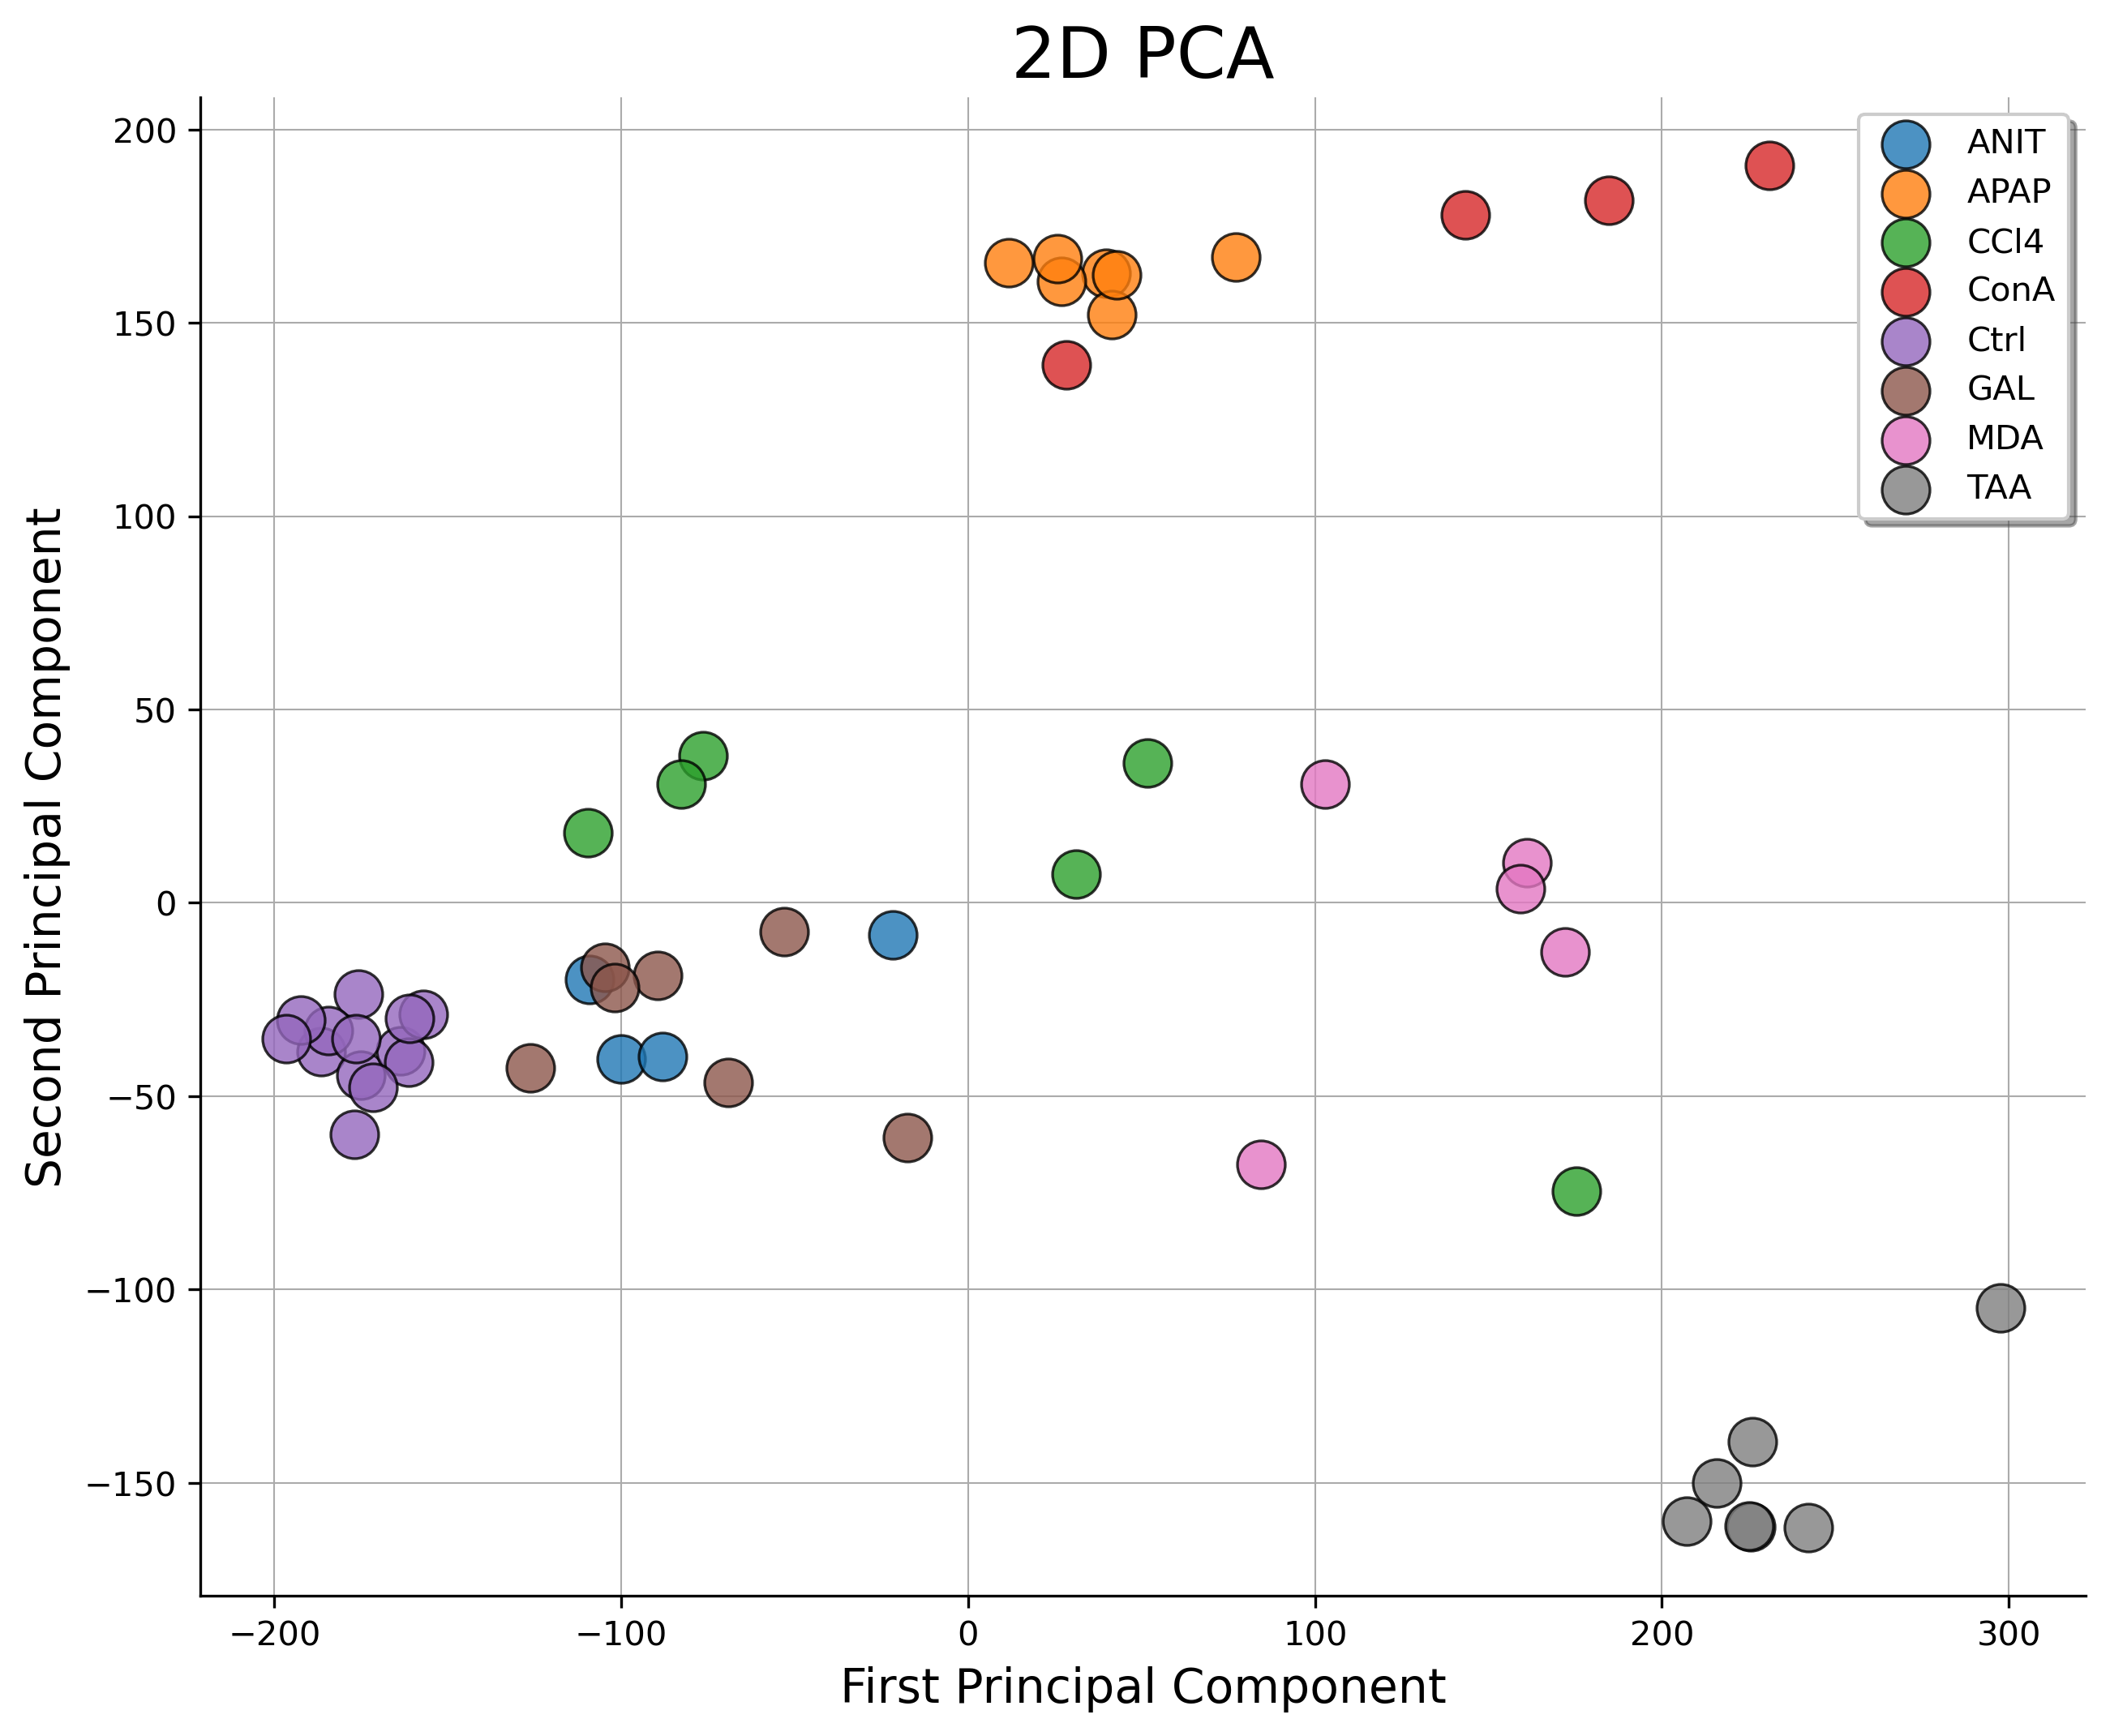

In [5]:
#%% PCA (2D)
norm_df = norm_df.replace([np.inf, -np.inf], np.nan)
final_df = norm_df.dropna().T

pca3 = PCA()
pca3.fit(final_df)
transformed = pca3.fit_transform(final_df)

pd.DataFrame(transformed, columns=["PC{}".format(x + 1) for x in range(len(transformed))]).head()

fig,ax = plt.subplots(figsize = (10, 8), dpi=300)

for label in np.unique(targets):
    p = ax.scatter(transformed[targets == label, 0],
                   transformed[targets == label, 1],
                   marker = 'o', s = 200, label=np.unique(target_names)[label],alpha=0.8,linewidths=0.8,edgecolor='k')

ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
plt.legend(shadow=True)
plt.title('2D PCA',fontsize = 21)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
ax.set_axisbelow(True)
ax.grid(color="#ababab",linewidth=0.5)
plt.show()

***

#### Deg heatmap

In [4]:
#%% DEG definition
import seaborn as sns

dat = ld.LiverDeconv()
dat.set_data(df_mix=target_mix, df_all=target_mix)
dat.pre_processing(do_ann=False,ann_df=None,do_log2=False,do_quantile=False,do_trimming=False,do_drop=True)
dat.narrow_intersec()
dat.create_ref(sep="_",number=50,limit_CV=10,limit_FC=1.2,log2=False,verbose=True)
final_ref = dat.final_ref
deg_dic = dat.deg_dic



(11588, 53)
(11588, 53)
drop nan
narrowd gene number : 11588
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
signature genes : 218


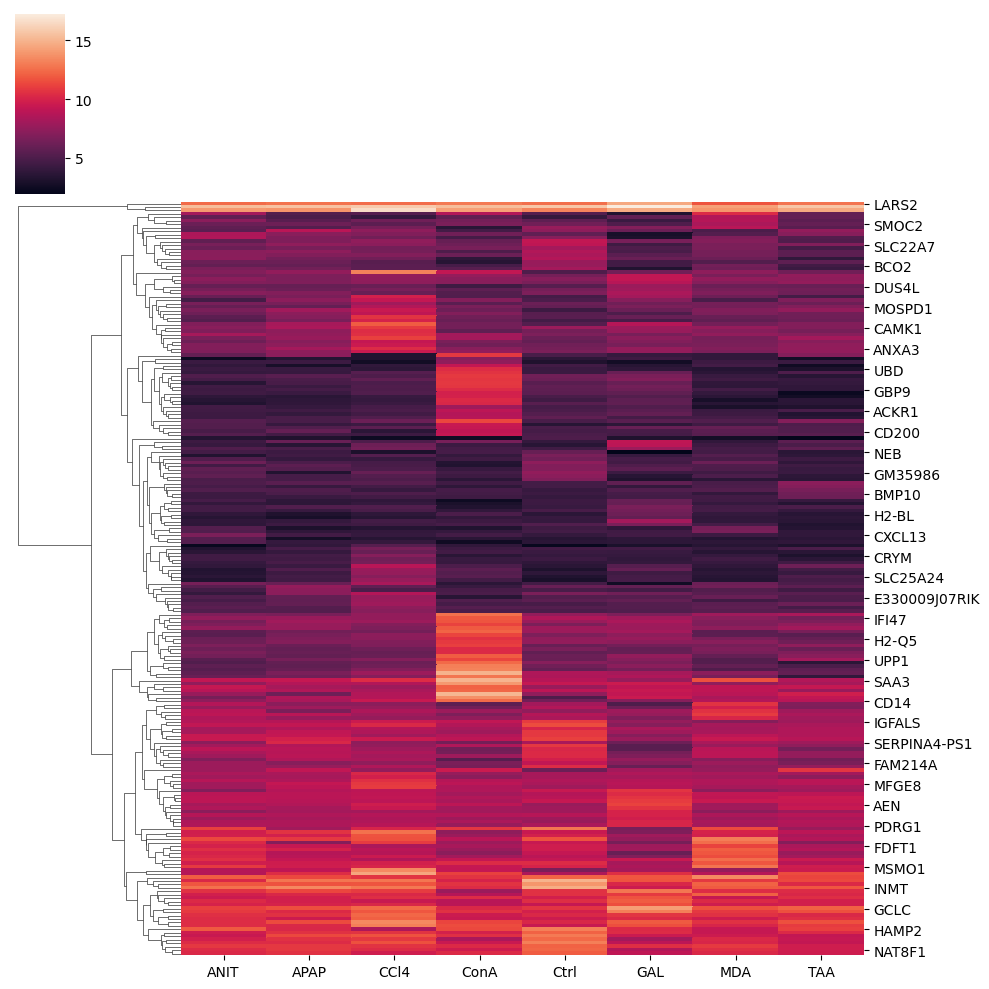

standardz population control


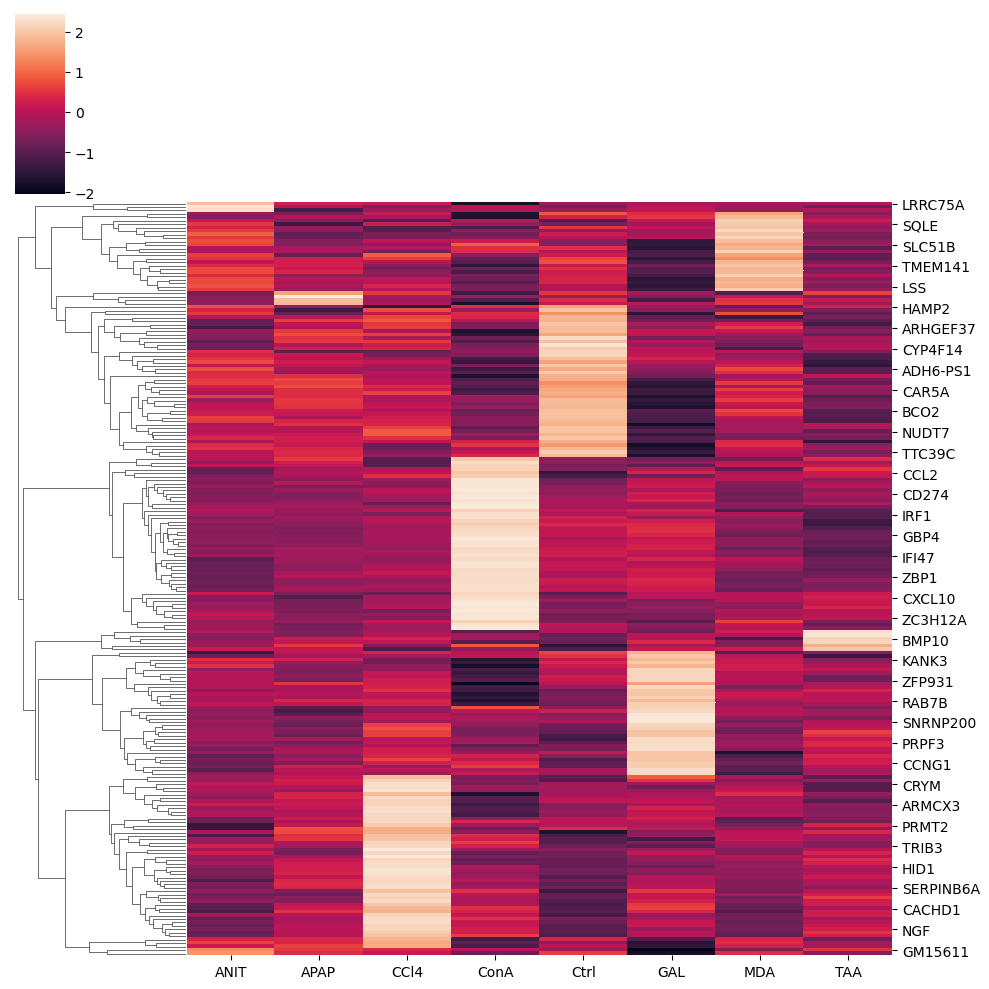

In [9]:
# plot
sns.clustermap(final_ref,col_cluster=False)
plt.show()

z_final_ref = pc.standardz_sample(final_ref.T) # sample-wide
z_final_ref.sum()

sns.clustermap(z_final_ref.T,col_cluster=False,annot_kws={"size": 16})
plt.show()